# LIVER TISSUE SAMPLE FROM DONOR 5

In [2]:
import pandas as pd
import numpy as np
import math
import re

## Load the file generated by salmon quant (converted to .xlsx)

In [6]:
donor = pd.read_excel("Donor5TPM.xlsx") 
donor

,Name,Length,EffectiveLength,TPM,NumReads
0,ENST00000456328.2|ENSG00000223972.5|OTTHUMG000...,1657,1407.000,0.000000,0.000
1,ENST00000450305.2|ENSG00000223972.5|OTTHUMG000...,632,382.000,0.000000,0.000
2,ENST00000488147.1|ENSG00000227232.5|OTTHUMG000...,1351,1101.000,0.000000,0.000
3,ENST00000619216.1|ENSG00000278267.1|-|-|MIR685...,68,2.848,0.000000,0.000
4,ENST00000473358.1|ENSG00000243485.5|OTTHUMG000...,712,462.000,0.000000,0.000
...,...,...,...,...,...
227457,ENST00000361681.2|ENSG00000198695.2|-|-|MT-ND6...,525,275.000,2806.418825,1069.713
227458,ENST00000387459.1|ENSG00000210194.1|-|-|MT-TE-...,69,2.865,762.694379,3.029
227459,ENST00000361789.2|ENSG00000198727.2|-|-|MT-CYB...,1141,891.000,7691.966242,9499.419
227460,ENST00000387460.2|ENSG00000210195.2|-|-|MT-TT-...,66,2.815,1281.571649,5.000


Modify the 'Name' column and remove the exessive columns

In [7]:
donor[['ENST','ENSG', 'OTTHUMG', 'OTTHUMT', 'GeneTranscriptID', 'GeneID', 'Length_1','Type', 'ToRemove']] = donor.Name.str.split("|",expand = True,)
donor = donor.drop(['Name','ENST','ENSG','OTTHUMG','OTTHUMT','Length_1','ToRemove'],axis = 1)
donor = donor[['GeneTranscriptID','GeneID','Length','Type','EffectiveLength','TPM', 'NumReads']]
donor

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
0,DDX11L1-202,DDX11L1,1657,lncRNA,1407.000,0.000000,0.000
1,DDX11L1-201,DDX11L1,632,transcribed_unprocessed_pseudogene,382.000,0.000000,0.000
2,WASH7P-201,WASH7P,1351,unprocessed_pseudogene,1101.000,0.000000,0.000
3,MIR6859-1-201,MIR6859-1,68,miRNA,2.848,0.000000,0.000
4,MIR1302-2HG-202,MIR1302-2HG,712,lncRNA,462.000,0.000000,0.000
...,...,...,...,...,...,...,...
227457,MT-ND6-201,MT-ND6,525,protein_coding,275.000,2806.418825,1069.713
227458,MT-TE-201,MT-TE,69,Mt_tRNA,2.865,762.694379,3.029
227459,MT-CYB-201,MT-CYB,1141,protein_coding,891.000,7691.966242,9499.419
227460,MT-TT-201,MT-TT,66,Mt_tRNA,2.815,1281.571649,5.000


Fix the order of columns

### Search for non-zero ranscripts

In [9]:
donor.loc[donor['TPM'] != 0] # Non-zero transcripts

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
23,AL627309.2-201,AL627309.2,323,lncRNA,73.133,9.865219,1.000
29,AL627309.5-206,AL627309.5,1229,lncRNA,979.000,0.736945,1.000
79,AL669831.3-204,AL669831.3,1022,lncRNA,772.000,0.934546,1.000
93,MTND1P23-201,MTND1P23,372,unprocessed_pseudogene,122.000,4279.696014,723.694
94,MTND2P28-201,MTND2P28,1044,unprocessed_pseudogene,794.000,1900.838599,2091.933
...,...,...,...,...,...,...,...
227457,MT-ND6-201,MT-ND6,525,protein_coding,275.000,2806.418825,1069.713
227458,MT-TE-201,MT-TE,69,Mt_tRNA,2.865,762.694379,3.029
227459,MT-CYB-201,MT-CYB,1141,protein_coding,891.000,7691.966242,9499.419
227460,MT-TT-201,MT-TT,66,Mt_tRNA,2.815,1281.571649,5.000


In [10]:
donor.loc[donor['TPM'] == 0]# Zero transcripts

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
0,DDX11L1-202,DDX11L1,1657,lncRNA,1407.000,0.0,0.0
1,DDX11L1-201,DDX11L1,632,transcribed_unprocessed_pseudogene,382.000,0.0,0.0
2,WASH7P-201,WASH7P,1351,unprocessed_pseudogene,1101.000,0.0,0.0
3,MIR6859-1-201,MIR6859-1,68,miRNA,2.848,0.0,0.0
4,MIR1302-2HG-202,MIR1302-2HG,712,lncRNA,462.000,0.0,0.0
...,...,...,...,...,...,...,...
227435,MT-TW-201,MT-TW,68,Mt_tRNA,2.848,0.0,0.0
227442,MT-TD-201,MT-TD,68,Mt_tRNA,2.848,0.0,0.0
227448,MT-TG-201,MT-TG,68,Mt_tRNA,2.848,0.0,0.0
227454,MT-TS2-201,MT-TS2,59,Mt_tRNA,2.702,0.0,0.0


In [13]:
donor.describe() # satatisctis for all the transcripts

,Length,EffectiveLength,TPM,NumReads
count,227462.000000,227462.000000,227462.000000,227462.000000
mean,1572.205001,1328.013905,4.396339,2.954775
std,1880.949598,1876.647383,302.041955,117.189600
min,8.000000,1.722000,0.000000,0.000000
25%,564.000000,314.000000,0.000000,0.000000
50%,881.000000,631.000000,0.000000,0.000000
75%,1990.000000,1740.000000,0.000000,0.000000
max,205012.000000,204762.000000,98776.043305,26292.911000


In [14]:
donor.loc[donor['TPM'] != 0].describe() # non-zero transcripts only

,Length,EffectiveLength,TPM,NumReads
count,24324.000000,24324.000000,24324.000000,24324.000000
mean,2874.368278,2624.735481,41.111659,27.631102
std,2851.774019,2851.429110,922.842597,357.419321
min,59.000000,2.702000,0.000001,0.000000
25%,1126.000000,876.000000,0.564089,1.513750
50%,2168.000000,1918.000000,1.604108,3.796500
75%,3820.250000,3570.250000,4.995647,9.865500
max,205012.000000,204762.000000,98776.043305,26292.911000


### Save the non-zero transcripts for futher work

In [15]:
donor = donor[donor.TPM != 0]
donor

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
23,AL627309.2-201,AL627309.2,323,lncRNA,73.133,9.865219,1.000
29,AL627309.5-206,AL627309.5,1229,lncRNA,979.000,0.736945,1.000
79,AL669831.3-204,AL669831.3,1022,lncRNA,772.000,0.934546,1.000
93,MTND1P23-201,MTND1P23,372,unprocessed_pseudogene,122.000,4279.696014,723.694
94,MTND2P28-201,MTND2P28,1044,unprocessed_pseudogene,794.000,1900.838599,2091.933
...,...,...,...,...,...,...,...
227457,MT-ND6-201,MT-ND6,525,protein_coding,275.000,2806.418825,1069.713
227458,MT-TE-201,MT-TE,69,Mt_tRNA,2.865,762.694379,3.029
227459,MT-CYB-201,MT-CYB,1141,protein_coding,891.000,7691.966242,9499.419
227460,MT-TT-201,MT-TT,66,Mt_tRNA,2.815,1281.571649,5.000


### Sort the transcripts by TPM to get the top-expressed transcripts

In [16]:
donor.sort_values(by = ['TPM'],  ascending = False) 

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
227449,MT-ND3-201,MT-ND3,346,protein_coding,96.006,98776.043305,13144.107
98,MTATP8P1-201,MTATP8P1,207,unprocessed_pseudogene,9.766,80434.995925,1088.787
202058,APOC1-201,APOC1,425,protein_coding,175.000,24240.357313,5879.752
227447,MT-CO3-201,MT-CO3,784,protein_coding,534.000,20862.246770,15441.316
99,MTATP6P1-201,MTATP6P1,681,unprocessed_pseudogene,431.000,18100.187179,10812.903
...,...,...,...,...,...,...,...
138573,MGAT4C-209,MGAT4C,25116,protein_coding,24866.000,0.034762,1.198
153203,RPS6KA5-207,RPS6KA5,26829,protein_coding,26579.000,0.027330,1.007
132327,GRIN2B-201,GRIN2B,30355,protein_coding,30105.000,0.023965,1.000
117592,KCNQ1OT1-201,KCNQ1OT1,91667,lncRNA,91417.000,0.008049,1.020


### Sort the transcripts by number of reads mapped

In [17]:
donor.sort_values(by = ['NumReads'],  ascending = False) 

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
95,MTCO1P12-201,MTCO1P12,1543,unprocessed_pseudogene,1293.000,14670.947862,26292.911
227428,MT-RNR2-201,MT-RNR2,1559,Mt_rRNA,1309.000,13592.419734,24661.438
54328,ALB-219,ALB,1418,protein_coding,1168.000,9757.083685,15795.917
227447,MT-CO3-201,MT-CO3,784,protein_coding,534.000,20862.246770,15441.316
227449,MT-ND3-201,MT-ND3,346,protein_coding,96.006,98776.043305,13144.107
...,...,...,...,...,...,...,...
226398,AC234781.5-202,AC234781.5,426,lncRNA,176.000,2.049629,0.500
178092,AC106017.1-202,AC106017.1,428,lncRNA,178.000,1.351067,0.333
178082,AC007952.8-201,AC007952.8,428,lncRNA,178.000,1.351067,0.333
178062,AC007952.3-202,AC007952.3,428,lncRNA,178.000,1.351067,0.333


### The quantitative profile of transcripts biotypes

In [19]:
donor['Type'].unique()

array(['lncRNA', 'unprocessed_pseudogene', 'retained_intron',
       'protein_coding', 'nonsense_mediated_decay',
       'processed_pseudogene', 'transcribed_unprocessed_pseudogene',
       'polymorphic_pseudogene', 'TEC', 'scaRNA',
       'transcribed_processed_pseudogene', 'scRNA', 'IG_V_gene',
       'IG_C_gene', 'snRNA', 'misc_RNA', 'non_stop_decay', 'snoRNA',
       'TR_C_gene', 'ribozyme', 'translated_processed_pseudogene',
       'miRNA', 'rRNA', 'Mt_rRNA', 'Mt_tRNA'], dtype=object)

In [20]:
for i in donor['Type'].unique():
    print(i,':', len(donor[donor['Type'].str.contains(i)]))

lncRNA : 3275
unprocessed_pseudogene : 66
retained_intron : 2236
protein_coding : 16711
nonsense_mediated_decay : 1652
processed_pseudogene : 285
transcribed_unprocessed_pseudogene : 24
polymorphic_pseudogene : 5
TEC : 64
scaRNA : 1
transcribed_processed_pseudogene : 10
scRNA : 1
IG_V_gene : 20
IG_C_gene : 20
snRNA : 6
misc_RNA : 4
non_stop_decay : 13
snoRNA : 5
TR_C_gene : 4
ribozyme : 1
translated_processed_pseudogene : 1
miRNA : 3
rRNA : 5
Mt_rRNA : 2
Mt_tRNA : 13


In [24]:
# RNA
RNA = len(donor[donor['Type'].str.contains(r'RNA')])

In [22]:
len(donor[donor['Type'].str.contains(r'pseudogene')]) + \
len(donor[donor['Type'].str.contains(r'transcribed_unprocessed_pseudogene')]) + \
len(donor[donor['Type'].str.contains(r'transcribed_processed_pseudogene')]) + \
len(donor[donor['Type'].str.contains(r'processed_pseudogene')]) + \
len(donor[donor['Type'].str.contains(r'unprocessed_pseudogene')]) + \
len(donor[donor['Type'].str.contains(r'polymorphic_pseudogene')]) + \
len(donor[donor['Type'].str.contains(r'transcribed_unitary_pseudogene')])


680

In [23]:
IGTR = len(donor[donor['Type'].str.contains(r'IG_V_gene')]) + \
len(donor[donor['Type'].str.contains(r'IG_C_gene')]) + \
len(donor[donor['Type'].str.contains(r'IG_V_pseudogene')]) + \
len(donor[donor['Type'].str.contains(r'TR_C_gene')]) + \
len(donor[donor['Type'].str.contains(r'TR_V_gene')])
IGTR

44

## Visualization

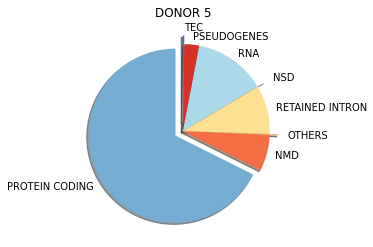

In [25]:
import matplotlib.pyplot as plt

labels = ['PROTEIN CODING', 
          'NMD',
          'OTHERS',
          'RETAINED INTRON',
          'NSD',
          'RNA', 
          'PSEUDOGENES', 
          'TEC']

sizes = [16711, 1652, 45, 2236, 13, 3313, 680, 64]

colors =['#74add1', '#f46d43', '#fdae61', '#fee090', '#e0f3f8', '#abd9e9','#d73027' , '#4575b4']


explode = (0.1, 0, 0.1, 0, 0.1, 0, 0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, colors = colors,
        shadow = True, startangle = 90)

ax1.set_title("DONOR 5")



# plt.savefig('Donor5_Sum.png')

plt.show()

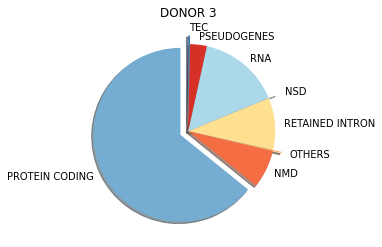

In [20]:
import matplotlib.pyplot as plt

labels = ['PROTEIN CODING', 
          'NMD',
          'OTHERS',
          'RETAINED INTRON',
          'NSD',
          'RNA', 
          'PSEUDOGENES', 
          'TEC']

sizes = [19675, 2181, 68, 2960, 13, 4703, 954, 97]

colors =['#74add1', '#f46d43', '#fdae61', '#fee090', '#e0f3f8', '#abd9e9','#d73027' , '#4575b4']

explode = (0.1, 0, 0.1, 0, 0.1, 0, 0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, colors = colors,
        shadow = True, startangle = 90)

ax1.set_title("DONOR 3")

#plt.savefig('Donor1_Sum.png')

plt.show()

### Retrieve protein_coding transcripts 

In [27]:
donor_protein = donor[donor['Type'].str.contains(r'protein_coding')]
donor_protein
# protein_coding = 16711

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
189,SAMD11-217,SAMD11,2557,protein_coding,2307.000,1.487038,4.755
202,NOC2L-201,NOC2L,2757,protein_coding,2507.000,0.748327,2.600
208,KLHL17-201,KLHL17,2567,protein_coding,2317.000,0.311381,1.000
209,KLHL17-205,KLHL17,1950,protein_coding,1700.000,0.424394,1.000
226,ISG15-202,ISG15,787,protein_coding,537.000,17.465744,13.000
...,...,...,...,...,...,...,...
227451,MT-ND4L-201,MT-ND4L,297,protein_coding,48.689,8466.422178,571.365
227452,MT-ND4-201,MT-ND4,1378,protein_coding,1128.000,7346.502458,11486.076
227456,MT-ND5-201,MT-ND5,1812,protein_coding,1562.000,758.584668,1642.355
227457,MT-ND6-201,MT-ND6,525,protein_coding,275.000,2806.418825,1069.713


In [41]:
donor_protein[(donor_protein['GeneID'] == 'MT-ND4')]

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
227452,MT-ND4-201,MT-ND4,1378,protein_coding,1128.0,7346.502458,11486.076


## Count the number of transcript isoforms (splice variant) in a single gene and a number of protein coding genes

In [42]:
spl_var_num = donor_protein.groupby('GeneID', as_index = False).count() 
spl_var_num

,GeneID,GeneTranscriptID,Length,Type,EffectiveLength,TPM,NumReads
0,A1BG,1,1,1,1,1,1
1,A1CF,3,3,3,3,3,3
2,A2M,1,1,1,1,1,1
3,AADAC,1,1,1,1,1,1
4,AADAT,1,1,1,1,1,1
...,...,...,...,...,...,...,...
10789,ZWINT,1,1,1,1,1,1
10790,ZXDB,1,1,1,1,1,1
10791,ZYG11B,1,1,1,1,1,1
10792,ZYX,2,2,2,2,2,2


## Summing the total TPM for each gene

In [43]:
total_tpm = donor_protein.groupby('GeneID', as_index = False).sum()
total_tpm

,GeneID,Length,EffectiveLength,TPM,NumReads
0,A1BG,3382,3132.0,22.947576,99.619
1,A1CF,27971,27221.0,15.040021,190.145
2,A2M,4844,4594.0,84.783300,539.863
3,AADAC,1563,1313.0,96.159312,175.000
4,AADAT,2101,1851.0,9.744322,25.000
...,...,...,...,...,...
10789,ZWINT,1857,1607.0,0.448954,1.000
10790,ZXDB,5894,5644.0,0.766977,6.000
10791,ZYG11B,8143,7893.0,1.188281,13.000
10792,ZYX,4173,3673.0,4.335988,11.000


In [44]:
total_tpm.insert(4, "NumSplVar", spl_var_num['Length'], True)

In [45]:
total_tpm

,GeneID,Length,EffectiveLength,TPM,NumSplVar,NumReads
0,A1BG,3382,3132.0,22.947576,1,99.619
1,A1CF,27971,27221.0,15.040021,3,190.145
2,A2M,4844,4594.0,84.783300,1,539.863
3,AADAC,1563,1313.0,96.159312,1,175.000
4,AADAT,2101,1851.0,9.744322,1,25.000
...,...,...,...,...,...,...
10789,ZWINT,1857,1607.0,0.448954,1,1.000
10790,ZXDB,5894,5644.0,0.766977,1,6.000
10791,ZYG11B,8143,7893.0,1.188281,1,13.000
10792,ZYX,4173,3673.0,4.335988,2,11.000


## There is 10794 protein coding genes in liver tissue of donor 5 (16711 transcripts)

In [46]:
for i in total_tpm['NumSplVar'].unique():
    print('Number of genes having',i,'isoforms (splice variants) is :', len(total_tpm[(total_tpm['NumSplVar'] == i)]))

Number of genes having 1 isoforms (splice variants) is : 6421
Number of genes having 3 isoforms (splice variants) is : 832
Number of genes having 2 isoforms (splice variants) is : 3264
Number of genes having 4 isoforms (splice variants) is : 187
Number of genes having 6 isoforms (splice variants) is : 19
Number of genes having 5 isoforms (splice variants) is : 53
Number of genes having 8 isoforms (splice variants) is : 5
Number of genes having 9 isoforms (splice variants) is : 4
Number of genes having 7 isoforms (splice variants) is : 9


Text(0.5, 0.98, 'DONOR 5')

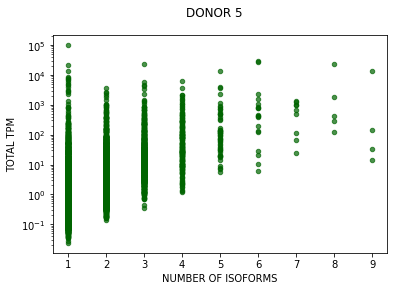

In [47]:
total_tpm.plot.scatter(x = "NumSplVar", y = "TPM", logy = True, alpha = 0.7, c = 'darkgreen')
plt.xlabel("NUMBER OF ISOFORMS")
plt.ylabel("TOTAL TPM")
plt.suptitle('DONOR 5')
# plt.savefig('Donor5_SplVar.png')

# Cytochrome P450

In [71]:
donor_cyp = donor_protein[donor_protein['GeneID'].str.contains(r'CYP')]
donor_cyp

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
6220,CYP4A11-202,CYP4A11,1760,protein_coding,1510.0,0.978932,2.049
6221,CYP4A11-201,CYP4A11,2530,protein_coding,2280.0,73.399186,231.957
6232,CYP4X1-201,CYP4X1,2256,protein_coding,2006.0,0.719312,2.000
6240,CYP4A22-203,CYP4A22,2535,protein_coding,2285.0,18.755942,59.403
6242,CYP4A22-206,CYP4A22,2351,protein_coding,2101.0,2.295016,6.683
...,...,...,...,...,...,...,...
201129,CYP2A7-201,CYP2A7,2128,protein_coding,1878.0,8.888168,23.136
201144,CYP2B6-201,CYP2B6,3071,protein_coding,2821.0,29.662807,115.984
218542,CYP2D6-205,CYP2D6,1588,protein_coding,1338.0,1.761759,3.267
218543,CYP2D6-203,CYP2D6,1714,protein_coding,1464.0,15.343628,31.135


## Count the number of transcript isoforms (splice variant) in a single gene and a number of protein coding genes

In [72]:
cyp_spl = donor_cyp.groupby('GeneID', as_index=False).count() 
cyp_spl

,GeneID,GeneTranscriptID,Length,Type,EffectiveLength,TPM,NumReads
0,ACYP2,2,2,2,2,2,2
1,CYP1A1,3,3,3,3,3,3
2,CYP1A2,1,1,1,1,1,1
3,CYP1B1,1,1,1,1,1,1
4,CYP20A1,1,1,1,1,1,1
5,CYP26A1,1,1,1,1,1,1
6,CYP27A1,1,1,1,1,1,1
7,CYP2A6,1,1,1,1,1,1
8,CYP2A7,2,2,2,2,2,2
9,CYP2B6,1,1,1,1,1,1


In [73]:
total_tpm_cyp = donor_cyp.groupby('GeneID', as_index=False).sum() # summing TPM on all splice varinats of a single gene
total_tpm_cyp   

,GeneID,Length,EffectiveLength,TPM,NumReads
0,ACYP2,2051,1551.0,9.344745,10.807
1,CYP1A1,7531,6781.0,20.995387,65.042
2,CYP1A2,3132,2882.0,85.875475,343.040
3,CYP1B1,5218,4968.0,0.145223,1.000
4,CYP20A1,1986,1736.0,1.246779,3.000
5,CYP26A1,2245,1995.0,1.425767,3.943
6,CYP27A1,1895,1645.0,22.178425,50.568
7,CYP2A6,1761,1511.0,43.212049,90.501
8,CYP2A7,4409,3909.0,21.038267,57.340
9,CYP2B6,3071,2821.0,29.662807,115.984


In [74]:
total_tpm_cyp.insert(4, "NumSplVar", cyp_spl['Length'], True)

In [75]:
total_tpm_cyp

,GeneID,Length,EffectiveLength,TPM,NumSplVar,NumReads
0,ACYP2,2051,1551.0,9.344745,2,10.807
1,CYP1A1,7531,6781.0,20.995387,3,65.042
2,CYP1A2,3132,2882.0,85.875475,1,343.040
3,CYP1B1,5218,4968.0,0.145223,1,1.000
4,CYP20A1,1986,1736.0,1.246779,1,3.000
5,CYP26A1,2245,1995.0,1.425767,1,3.943
6,CYP27A1,1895,1645.0,22.178425,1,50.568
7,CYP2A6,1761,1511.0,43.212049,1,90.501
8,CYP2A7,4409,3909.0,21.038267,2,57.340
9,CYP2B6,3071,2821.0,29.662807,1,115.984


In [76]:
total_tpm_cyp = total_tpm_cyp.iloc[1:] # Drop non-CYP

In [77]:
len(total_tpm_cyp)

37

## There is 37 CYP gene in donor 5

Text(0.5, 0.98, 'DONOR 5')

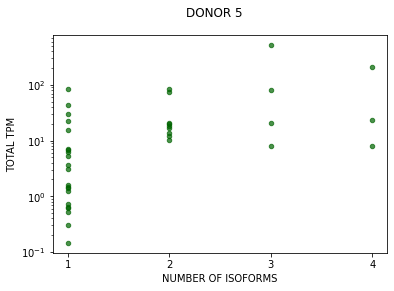

In [80]:
total_tpm_cyp.plot.scatter(x = "NumSplVar", y = "TPM", logy = True, alpha = 0.7, c = 'darkgreen')
plt.xticks([1,2,3,4])
plt.xlabel("NUMBER OF ISOFORMS")
plt.ylabel("TOTAL TPM")
plt.suptitle('DONOR 5')
# plt.savefig('Donor5_SplVarСyp.png')

In [81]:
len(total_tpm_cyp[total_tpm_cyp.NumSplVar == 1])

21

In [82]:
total_tpm_cyp.describe()

,Length,EffectiveLength,TPM,NumSplVar,NumReads
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,4349.324324,3923.648649,37.203196,1.702703,101.564568
std,2581.200400,2390.259530,90.026366,0.967955,206.867124
min,1709.000000,1459.000000,0.145223,1.000000,1.000000
25%,2245.000000,1995.000000,1.579276,1.000000,4.004000
50%,3781.000000,3438.000000,10.346667,1.000000,34.762000
75%,5218.000000,4935.000000,22.178425,2.000000,73.000000
max,11923.000000,10923.000000,514.801929,4.000000,1097.154000


In [60]:
#total_tpm_cyp.to_excel("sum_cyp_donor.xlsx") 

# Pharmacogenes

In [61]:
pharmgenes = pd.read_excel("Pharmacogenes.xlsx") # The list of pharmacogenes from Chhibber et al., 2017
pharmgenes = pharmgenes.set_index('Gene')

In [62]:
pharmgenes

,Number,Ensembl Gene ID,Category,Drug Target,GPCR as Drug Target,Enzyme as as Drug Target,Ion Channel as Drug Target
Gene,,,,,,,
ABCA1,1,ENSG00000165029.11,ABC_Transporter,N,N,N,N
ABCA4,2,ENSG00000198691.6,ABC_Transporter,Y,N,N,N
ABCB1,3,ENSG00000085563.8,ABC_Transporter,Y,N,N,N
ABCB10,4,ENSG00000135776.4,ABC_Transporter,N,N,N,N
ABCB11,5,ENSG00000073734.8,ABC_Transporter,N,N,N,N
...,...,...,...,...,...,...,...
VDR,385,ENSG00000111424.6,Nuclear Receptor/Transcription Factor,Y,N,N,N
VKORC1,386,ENSG00000167397.10,Other,Y,N,N,N
XDH,387,ENSG00000158125.5,Other_Metabolism,Y,N,Y,N


In [63]:
## Set the GeneID as index column

In [64]:
prot_idx = total_tpm.set_index('GeneID')
prot_idx

,Length,EffectiveLength,TPM,NumSplVar,NumReads
GeneID,,,,,
A1BG,3382,3132.0,22.947576,1,99.619
A1CF,27971,27221.0,15.040021,3,190.145
A2M,4844,4594.0,84.783300,1,539.863
AADAC,1563,1313.0,96.159312,1,175.000
AADAT,2101,1851.0,9.744322,1,25.000
...,...,...,...,...,...
ZWINT,1857,1607.0,0.448954,1,1.000
ZXDB,5894,5644.0,0.766977,1,6.000
ZYG11B,8143,7893.0,1.188281,1,13.000


## Search for pharmacogenes in the donor 5

In [65]:
pharmgenes_donor = prot_idx[prot_idx.index.isin(pharmgenes.index)]
pharmgenes_donor

,Length,EffectiveLength,TPM,NumSplVar,NumReads
GeneID,,,,,
ABCA1,10408,10158.0,2.272793,1,32.000
ABCB1,4645,4395.0,0.232814,1,1.418
ABCB10,3869,3619.0,0.797424,1,4.000
ABCB11,7345,6845.0,33.634978,2,28.000
ABCB4,8753,8003.0,20.224449,3,45.206
...,...,...,...,...,...
UGT2B4,3936,3436.0,106.920357,2,253.681
UGT2B7,5053,4303.0,256.776959,3,491.381
VKORC1,3539,2539.0,137.767532,4,116.541


## There is 248 pharmacogenes found in donor 1

In [66]:
#pharmgenes_donor.to_excel("Pharmacogenes_d1.xlsx") 

## Sort by TPM to get the top-expressed pharmacogenes

In [67]:
pharmgenes_donor.sort_values(by = ['TPM'], ascending = False).head(50)

,Length,EffectiveLength,TPM,NumSplVar,NumReads
GeneID,,,,,
APOA2,2505,1017.222,27372.867738,6,6452.900
ALB,13622,11622.000,23549.590466,8,42434.922
APOA1,5114,3864.000,13991.793070,5,13373.656
ORM1,802,552.000,6756.077485,1,5169.109
ORM2,764,514.000,2746.768772,1,1956.894
APOE,2030,1530.000,2709.262184,2,3423.013
SERPINA1,19803,17803.000,1824.426834,8,4109.159
RPL13,10235,8735.000,800.324897,6,550.976
CES1,4693,3943.000,550.076199,3,731.109


In [68]:
phgt = pharmgenes[pharmgenes.index.isin(pharmgenes_donor.index)]
phgt

,Number,Ensembl Gene ID,Category,Drug Target,GPCR as Drug Target,Enzyme as as Drug Target,Ion Channel as Drug Target
Gene,,,,,,,
ABCA1,1,ENSG00000165029.11,ABC_Transporter,N,N,N,N
ABCB1,3,ENSG00000085563.8,ABC_Transporter,Y,N,N,N
ABCB10,4,ENSG00000135776.4,ABC_Transporter,N,N,N,N
ABCB11,5,ENSG00000073734.8,ABC_Transporter,N,N,N,N
ABCB4,6,ENSG00000005471.11,ABC_Transporter,N,N,N,N
...,...,...,...,...,...,...,...
UGT2B4,382,ENSG00000156096.8,UGT_Metabolism,N,N,N,N
UGT2B7,383,ENSG00000171234.9,UGT_Metabolism,N,N,N,N
VKORC1,386,ENSG00000167397.10,Other,Y,N,N,N


## Quantification

In [69]:
len(phgt['Category'].unique())

14

In [70]:
print('ABC_Transporter:', len(phgt[phgt['Category'].str.contains(r'ABC_Transporter')]))
print('Other:', len(phgt[phgt['Category'].str.contains(r'Other')]))
print('ADH_Metabolism:', len(phgt[phgt['Category'].str.contains(r'ADH_Metabolism')]))
print('Receptor:', len(phgt[phgt['Category'].str.contains(r'Receptor')]))
print('Nuclear Receptor/Transcription Factor:', len(phgt[phgt['Category'].str.contains(r'Nuclear Receptor/Transcription Factor')]))
print('ALDH_Metabolism:', len(phgt[phgt['Category'].str.contains(r'ALDH_Metabolism')]))
print('Other_Metabolism:', len(phgt[phgt['Category'].str.contains(r'Other_Metabolism')]))
print('Other_Transporter:', len(phgt[phgt['Category'].str.contains(r'Other_Transporter')]))
print('CYP_Metabolism:', len(phgt[phgt['Category'].str.contains(r'CYP_Metabolism')]))
print('GST_Metabolism:', len(phgt[phgt['Category'].str.contains(r'GST_Metabolism')]))
print('Channel:', len(phgt[phgt['Category'].str.contains(r'Channel')]))
print('SLC_Transporter:', len(phgt[phgt['Category'].str.contains(r'SLC_Transporter')]))
print('SULT_Metabolism:', len(phgt[phgt['Category'].str.contains(r'SULT_Metabolism')]))
print('UGT_Metabolism:', len(phgt[phgt['Category'].str.contains(r'UGT_Metabolism')]))

ABC_Transporter: 17
Other: 95
ADH_Metabolism: 6
Receptor: 29
Nuclear Receptor/Transcription Factor: 21
ALDH_Metabolism: 6
Other_Metabolism: 42
Other_Transporter: 3
CYP_Metabolism: 31
GST_Metabolism: 12
Channel: 2
SLC_Transporter: 29
SULT_Metabolism: 6
UGT_Metabolism: 15
